In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [26]:
df = pd.read_csv('./logs/simulation_results.csv')
df

,Nome_Config_Arquivo,N_Nos_Config,N_Msg_Config,N_Caminhos_Completos,Tamanho_do_Slotframe,N_Transmissoes_Totais,N_Canais_Usados,Network_Coding,Msg_Iniciadas,Msg_Nao_Enviadas_Sem_Rota,Msg_Descartadas_Hop_Limit,Msg_Descartadas_Sem_Prox_Caminho,Total_Retransmissoes_Logicas
0,5nodes2msgs,5,2,0,2,4,4,0,2,0,0,0,2
1,6nodes2msgs,6,2,0,2,6,4,0,2,0,0,0,4
2,6nodes4msgs,6,4,0,2,10,5,0,4,0,0,0,6
3,7nodes4msgs,7,3,0,2,9,5,0,3,0,0,0,6
4,9nodes2msgs,9,2,0,2,11,5,0,2,0,0,1,9
5,9nodes4msgs,9,4,0,2,16,8,0,4,0,0,2,12
6,5nodes2msgs,5,2,4,2,5,3,1,2,0,0,0,0
7,6nodes2msgs,6,2,4,2,5,3,1,2,0,0,0,0
8,6nodes4msgs,6,4,5,2,7,2,1,3,0,0,0,0
9,7nodes4msgs,7,3,3,2,4,3,1,0,0,0,0,0


In [ ]:
# Convert 'Network_Coding' column to boolean for easier plotting labels
df['Network_Coding_Label'] = df['Network_Coding'].map({0: 'Sem Network Coding', 1: 'Com Network Coding'})

# Sort by N_Nos_Config for cleaner plots
df_sorted = df.sort_values(by='N_Nos_Config')

# Get unique network sizes for x-axis labels
network_sizes = sorted(df_sorted['N_Nos_Config'].unique())

# Define o caminho para a pasta onde as imagens serão salvas
output_image_dir = 'img'

# Verifica se a pasta existe, se não, a cria
if not os.path.exists(output_image_dir):
    os.makedirs(output_image_dir)
    print(f"Diretório '{output_image_dir}' criado com sucesso.")
else:
    print(f"Diretório '{output_image_dir}' já existe.")

FileNotFoundError: [Errno 2] No such file or directory: '/home/thaiswsl/GitHub/Redes_Sem_Fio-NetworkCodingTSCH/pythonCode/img/caminhos_completos_vs_nos.png'

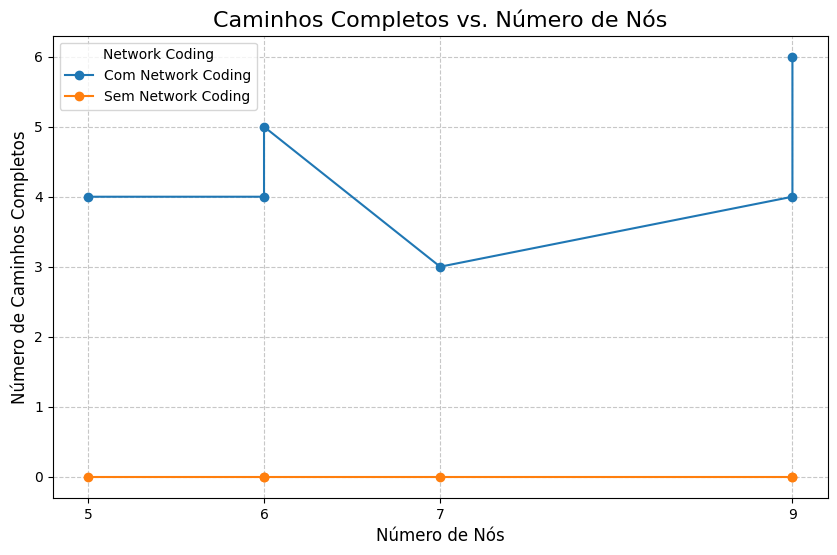

In [ ]:
# Plot 1: N_Caminhos_Completos vs N_Nos_Config
plt.figure(figsize=(10, 6))
for nc_status, group in df_sorted.groupby('Network_Coding_Label'):
    plt.plot(group['N_Nos_Config'], group['N_Caminhos_Completos'], marker='o', label=nc_status)
plt.title('Caminhos Completos vs. Número de Nós', fontsize=16)
plt.xlabel('Número de Nós', fontsize=12)
plt.ylabel('Número de Caminhos Completos', fontsize=12)
plt.xticks(network_sizes)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Network Coding')
plt.savefig(os.path.join(output_image_dir, 'caminhos_completos_vs_nos.png'), bbox_inches='tight')


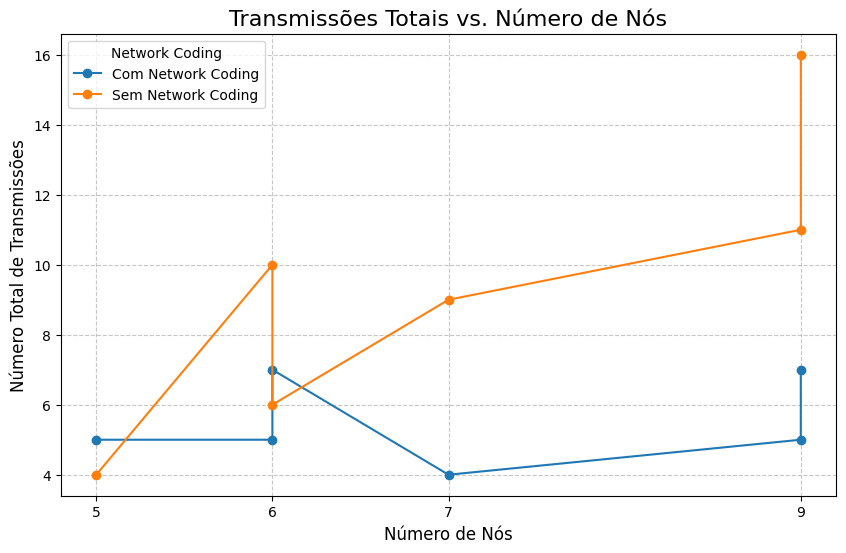

In [ ]:
# Plot 2: N_Transmissoes_Totais vs N_Nos_Config
plt.figure(figsize=(10, 6))
for nc_status, group in df_sorted.groupby('Network_Coding_Label'):
    plt.plot(group['N_Nos_Config'], group['N_Transmissoes_Totais'], marker='o', label=nc_status)
plt.title('Transmissões Totais vs. Número de Nós', fontsize=16)
plt.xlabel('Número de Nós', fontsize=12)
plt.ylabel('Número Total de Transmissões', fontsize=12)
plt.xticks(network_sizes)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Network Coding')
plt.savefig(os.path.join(output_image_dir, 'transmissoes_totais_vs_nos.png'), bbox_inches='tight')


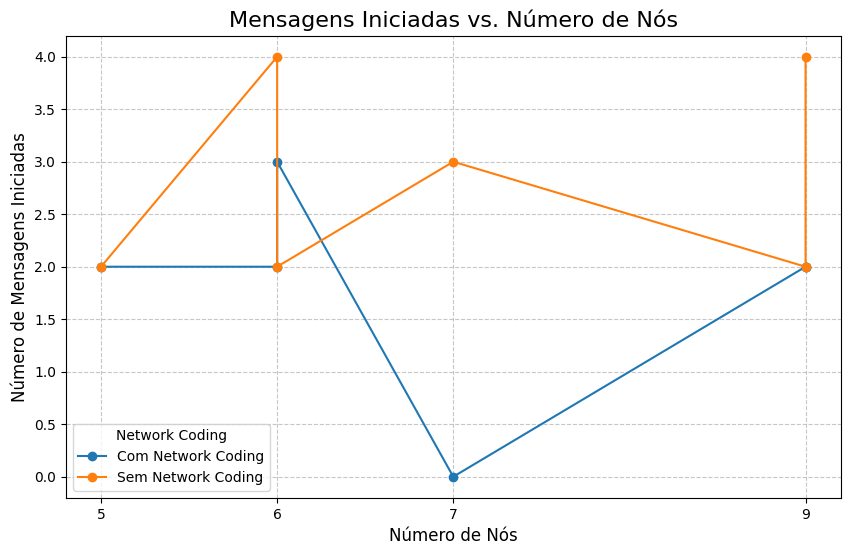

In [ ]:
# Plot 3: Msg_Iniciadas vs N_Nos_Config
plt.figure(figsize=(10, 6))
for nc_status, group in df_sorted.groupby('Network_Coding_Label'):
    plt.plot(group['N_Nos_Config'], group['Msg_Iniciadas'], marker='o', label=nc_status)
plt.title('Mensagens Iniciadas vs. Número de Nós', fontsize=16)
plt.xlabel('Número de Nós', fontsize=12)
plt.ylabel('Número de Mensagens Iniciadas', fontsize=12)
plt.xticks(network_sizes)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Network Coding')
plt.savefig(os.path.join(output_image_dir, 'mensagens_iniciadas_vs_nos.png'), bbox_inches='tight')


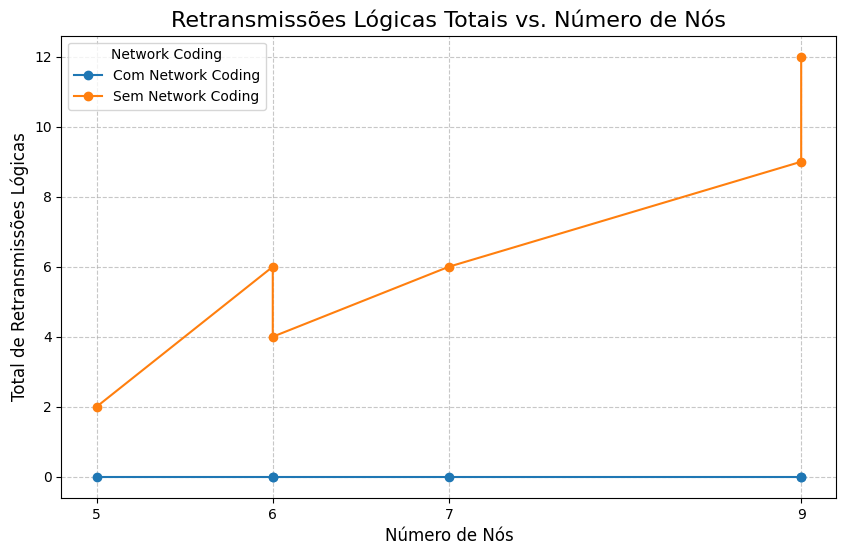

In [ ]:
# Plot 4: Total_Retransmissoes_Logicas vs N_Nos_Config
plt.figure(figsize=(10, 6))
for nc_status, group in df_sorted.groupby('Network_Coding_Label'):
    plt.plot(group['N_Nos_Config'], group['Total_Retransmissoes_Logicas'], marker='o', label=nc_status)
plt.title('Retransmissões Lógicas Totais vs. Número de Nós', fontsize=16)
plt.xlabel('Número de Nós', fontsize=12)
plt.ylabel('Total de Retransmissões Lógicas', fontsize=12)
plt.xticks(network_sizes)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Network Coding')
plt.savefig(os.path.join(output_image_dir, 'retransmissoes_logicas_vs_nos.png'), bbox_inches='tight')
